In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#add patient info for the ones with initial data
common = Initial_relative.index.intersection(Patient_Info.index)
common2 = Recurrence_relative.index.intersection(Patient_Info.index)
final_common = Recurrence_relative.index.intersection(Initial_relative.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', name='Mixture', length=181)

In [7]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
idh = combined_data.loc[:, combined_data.columns == "IDH"]
mutant = combined_data.loc[:, combined_data.columns == "1p19qcodel"]
class_data = idh.join(mutant)
class_data

IDH 1p19qcodel
Patient_ID                   
PS001        IDHwt   noncodel
PS002        IDHwt   noncodel
PS003        IDHwt   noncodel
PS004        IDHwt   noncodel
PS005        IDHwt   noncodel
PS006        IDHwt   noncodel
PS007        IDHwt   noncodel
PS008        IDHwt   noncodel
PS009       IDHmut   noncodel
PS010        IDHwt   noncodel
PS012       IDHmut   noncodel
PS019        IDHwt   noncodel
PS020        IDHwt   noncodel
PS021        IDHwt   noncodel
PS022        IDHwt   noncodel
PS023        IDHwt   noncodel
PS024        IDHwt   noncodel
PS025        IDHwt   noncodel
PS026        IDHwt   noncodel
PS027       IDHmut   noncodel
PS029        IDHwt   noncodel
PS030        IDHwt   noncodel
PS033        IDHwt   noncodel
PS034        IDHwt   noncodel
PS035        IDHwt   noncodel
PS038        IDHwt   noncodel
PS042        IDHwt   noncodel
PS056        IDHwt   noncodel
PS060        IDHwt   noncodel
PS061        IDHwt   noncodel
PS063        IDHwt   noncodel
PS064        IDHwt   noncodel
PS065        IDHwt   noncodel
PS066        IDHwt   noncodel
PS067        IDHwt   noncodel
PS068        IDHwt   noncodel
PS070        IDHwt   noncodel
PS071        IDHwt   noncodel
PS072        IDHwt   noncodel
PS074        IDHwt   noncodel
PS076       IDHmut   noncodel
PS078       IDHmut   noncodel
PS080        IDHwt   noncodel
PS081        IDHwt   noncodel
PS082        IDHwt   noncodel
PS083        IDHwt   noncodel
PS084       IDHmut   noncodel
PS085        IDHwt   noncodel
PS087        IDHwt   noncodel
PS088        IDHwt   noncodel
PS089        IDHwt   noncodel
PS090        IDHwt   noncodel
PS092        IDHwt   noncodel
PS093        IDHwt   noncodel
PS095        IDHwt   noncodel
PS099        IDHwt   noncodel
PS100        IDHwt   noncodel
PS101        IDHwt   noncodel
PS102        IDHwt   noncodel
PS103        IDHwt   noncodel
PS104        IDHwt   noncodel
PS106        IDHwt   noncodel
PS107        IDHwt   noncodel
PS108        IDHwt   noncodel
PS109        IDHwt   noncodel
PS110        IDHwt   noncodel
PS111        IDHwt   noncodel
PS112        IDHwt   noncodel
PS113        IDHwt   noncodel
PS114       IDHmut   noncodel
PS117        IDHwt   noncodel
PS118       IDHmut   noncodel
PS122        IDHwt   noncodel
PS123        IDHwt   noncodel
PS124       IDHmut   noncodel
PS125       IDHmut   noncodel
PS126       IDHmut   noncodel
PS127       IDHmut      codel
PS130       IDHmut   noncodel
PS132       IDHmut   noncodel
PS133       IDHmut   noncodel
PS135        IDHwt   noncodel
PS136       IDHmut   noncodel
PS137        IDHwt   noncodel
PS138        IDHwt   noncodel
PS139       IDHmut      codel
PS140        IDHwt   noncodel
PS141       IDHmut      codel
PS142       IDHmut   noncodel
PS143        IDHwt   noncodel
PS144       IDHmut   noncodel
PS146        IDHwt   noncodel
PS147       IDHmut   noncodel
PS148       IDHmut      codel
PS149       IDHmut   noncodel
PS150       IDHmut      codel
PS151       IDHmut   noncodel
PS152       IDHmut   noncodel
PS153       IDHmut   noncodel
PS155       IDHmut   noncodel
PS156       IDHmut   noncodel
PS157       IDHmut   noncodel
PS158        IDHwt   noncodel
PS159       IDHmut   noncodel
PS160        IDHwt   noncodel
PS161        IDHwt   noncodel
PS162        IDHwt   noncodel
PS163        IDHwt   noncodel
PS164        IDHwt   noncodel
PS165        IDHwt   noncodel
PS166       IDHmut   noncodel
PS167       IDHmut      codel
PS168        IDHwt   noncodel
PS169       IDHmut   noncodel
PS170        IDHwt   noncodel
PS171        IDHwt   noncodel
PS172       IDHmut   noncodel
PS173       IDHmut      codel
PS174       IDHmut   noncodel
PS175        IDHwt   noncodel
PS176        IDHwt   noncodel
PS177       IDHmut   noncodel
PS178       IDHmut   noncodel
PS179       IDHmut   noncodel
PS180       IDHmut      codel
PS181        IDHwt   noncodel
PS182       IDHmut   noncodel
PS184       IDHmut   noncodel
PS185       IDHmut      codel
PS186       IDHmut   noncodel
PS187        IDHwt   noncodel
PS188       IDHmut   nonc

In [8]:
#selecting for IDHwt
select = class_data[(class_data['IDH']=="IDHwt")]
class_data.loc[select.index, 'Molecular Class'] = "IDH - wildtype"
class_data

IDH 1p19qcodel Molecular Class
Patient_ID                                   
PS001        IDHwt   noncodel  IDH - wildtype
PS002        IDHwt   noncodel  IDH - wildtype
PS003        IDHwt   noncodel  IDH - wildtype
PS004        IDHwt   noncodel  IDH - wildtype
PS005        IDHwt   noncodel  IDH - wildtype
PS006        IDHwt   noncodel  IDH - wildtype
PS007        IDHwt   noncodel  IDH - wildtype
PS008        IDHwt   noncodel  IDH - wildtype
PS009       IDHmut   noncodel             NaN
PS010        IDHwt   noncodel  IDH - wildtype
PS012       IDHmut   noncodel             NaN
PS019        IDHwt   noncodel  IDH - wildtype
PS020        IDHwt   noncodel  IDH - wildtype
PS021        IDHwt   noncodel  IDH - wildtype
PS022        IDHwt   noncodel  IDH - wildtype
PS023        IDHwt   noncodel  IDH - wildtype
PS024        IDHwt   noncodel  IDH - wildtype
PS025        IDHwt   noncodel  IDH - wildtype
PS026        IDHwt   noncodel  IDH - wildtype
PS027       IDHmut   noncodel             NaN
PS029        IDHwt   noncodel  IDH - wildtype
PS030        IDHwt   noncodel  IDH - wildtype
PS033        IDHwt   noncodel  IDH - wildtype
PS034        IDHwt   noncodel  IDH - wildtype
PS035        IDHwt   noncodel  IDH - wildtype
PS038        IDHwt   noncodel  IDH - wildtype
PS042        IDHwt   noncodel  IDH - wildtype
PS056        IDHwt   noncodel  IDH - wildtype
PS060        IDHwt   noncodel  IDH - wildtype
PS061        IDHwt   noncodel  IDH - wildtype
PS063        IDHwt   noncodel  IDH - wildtype
PS064        IDHwt   noncodel  IDH - wildtype
PS065        IDHwt   noncodel  IDH - wildtype
PS066        IDHwt   noncodel  IDH - wildtype
PS067        IDHwt   noncodel  IDH - wildtype
PS068        IDHwt   noncodel  IDH - wildtype
PS070        IDHwt   noncodel  IDH - wildtype
PS071        IDHwt   noncodel  IDH - wildtype
PS072        IDHwt   noncodel  IDH - wildtype
PS074        IDHwt   noncodel  IDH - wildtype
PS076       IDHmut   noncodel             NaN
PS078       IDHmut   noncodel             NaN
PS080        IDHwt   noncodel  IDH - wildtype
PS081        IDHwt   noncodel  IDH - wildtype
PS082        IDHwt   noncodel  IDH - wildtype
PS083        IDHwt   noncodel  IDH - wildtype
PS084       IDHmut   noncodel             NaN
PS085        IDHwt   noncodel  IDH - wildtype
PS087        IDHwt   noncodel  IDH - wildtype
PS088        IDHwt   noncodel  IDH - wildtype
PS089        IDHwt   noncodel  IDH - wildtype
PS090        IDHwt   noncodel  IDH - wildtype
PS092        IDHwt   noncodel  IDH - wildtype
PS093        IDHwt   noncodel  IDH - wildtype
PS095        IDHwt   noncodel  IDH - wildtype
PS099        IDHwt   noncodel  IDH - wildtype
PS100        IDHwt   noncodel  IDH - wildtype
PS101        IDHwt   noncodel  IDH - wildtype
PS102        IDHwt   noncodel  IDH - wildtype
PS103        IDHwt   noncodel  IDH - wildtype
PS104        IDHwt   noncodel  IDH - wildtype
PS106        IDHwt   noncodel  IDH - wildtype
PS107        IDHwt   noncodel  IDH - wildtype
PS108        IDHwt   noncodel  IDH - wildtype
PS109        IDHwt   noncodel  IDH - wildtype
PS110        IDHwt   noncodel  IDH - wildtype
PS111        IDHwt   noncodel  IDH - wildtype
PS112        IDHwt   noncodel  IDH - wildtype
PS113        IDHwt   noncodel  IDH - wildtype
PS114       IDHmut   noncodel             NaN
PS117        IDHwt   noncodel  IDH - wildtype
PS118       IDHmut   noncodel             NaN
PS122        IDHwt   noncodel  IDH - wildtype
PS123        IDHwt   noncodel  IDH - wildtype
PS124       IDHmut   noncodel             NaN
PS125       IDHmut   noncodel             NaN
PS126       IDHmut   noncodel             NaN
PS127       IDHmut      codel             NaN
PS130       IDHmut   noncodel             NaN
PS132       IDHmut   noncodel             NaN
PS133       IDHmut   noncodel             NaN
PS135        IDHwt   noncodel  IDH - wildtype
PS136       IDHmut   noncodel             NaN
PS137        IDHwt   noncodel  IDH - wildtype
PS138        IDHwt   noncodel  IDH - wildtype
PS139       I

In [9]:
#selecting for IDH – mutant + noncodel
select2 = class_data[(class_data['IDH']=="IDHmut")&(class_data['1p19qcodel']=="noncodel")]
class_data.loc[select2.index, 'Molecular Class'] = "IDH – mutant (noncodel)"
class_data

IDH 1p19qcodel          Molecular Class
Patient_ID                                            
PS001        IDHwt   noncodel           IDH - wildtype
PS002        IDHwt   noncodel           IDH - wildtype
PS003        IDHwt   noncodel           IDH - wildtype
PS004        IDHwt   noncodel           IDH - wildtype
PS005        IDHwt   noncodel           IDH - wildtype
PS006        IDHwt   noncodel           IDH - wildtype
PS007        IDHwt   noncodel           IDH - wildtype
PS008        IDHwt   noncodel           IDH - wildtype
PS009       IDHmut   noncodel  IDH – mutant (noncodel)
PS010        IDHwt   noncodel           IDH - wildtype
PS012       IDHmut   noncodel  IDH – mutant (noncodel)
PS019        IDHwt   noncodel           IDH - wildtype
PS020        IDHwt   noncodel           IDH - wildtype
PS021        IDHwt   noncodel           IDH - wildtype
PS022        IDHwt   noncodel           IDH - wildtype
PS023        IDHwt   noncodel           IDH - wildtype
PS024        IDHwt   noncodel           IDH - wildtype
PS025        IDHwt   noncodel           IDH - wildtype
PS026        IDHwt   noncodel           IDH - wildtype
PS027       IDHmut   noncodel  IDH – mutant (noncodel)
PS029        IDHwt   noncodel           IDH - wildtype
PS030        IDHwt   noncodel           IDH - wildtype
PS033        IDHwt   noncodel           IDH - wildtype
PS034        IDHwt   noncodel           IDH - wildtype
PS035        IDHwt   noncodel           IDH - wildtype
PS038        IDHwt   noncodel           IDH - wildtype
PS042        IDHwt   noncodel           IDH - wildtype
PS056        IDHwt   noncodel           IDH - wildtype
PS060        IDHwt   noncodel           IDH - wildtype
PS061        IDHwt   noncodel           IDH - wildtype
PS063        IDHwt   noncodel           IDH - wildtype
PS064        IDHwt   noncodel           IDH - wildtype
PS065        IDHwt   noncodel           IDH - wildtype
PS066        IDHwt   noncodel           IDH - wildtype
PS067        IDHwt   noncodel           IDH - wildtype
PS068        IDHwt   noncodel           IDH - wildtype
PS070        IDHwt   noncodel           IDH - wildtype
PS071        IDHwt   noncodel           IDH - wildtype
PS072        IDHwt   noncodel           IDH - wildtype
PS074        IDHwt   noncodel           IDH - wildtype
PS076       IDHmut   noncodel  IDH – mutant (noncodel)
PS078       IDHmut   noncodel  IDH – mutant (noncodel)
PS080        IDHwt   noncodel           IDH - wildtype
PS081        IDHwt   noncodel           IDH - wildtype
PS082        IDHwt   noncodel           IDH - wildtype
PS083        IDHwt   noncodel           IDH - wildtype
PS084       IDHmut   noncodel  IDH – mutant (noncodel)
PS085        IDHwt   noncodel           IDH - wildtype
PS087        IDHwt   noncodel           IDH - wildtype
PS088        IDHwt   noncodel           IDH - wildtype
PS089        IDHwt   noncodel           IDH - wildtype
PS090        IDHwt   noncodel           IDH - wildtype
PS092        IDHwt   noncodel           IDH - wildtype
PS093        IDHwt   noncodel           IDH - wildtype
PS095        IDHwt   noncodel           IDH - wildtype
PS099        IDHwt   noncodel           IDH - wildtype
PS100        IDHwt   noncodel           IDH - wildtype
PS101        IDHwt   noncodel           IDH - wildtype
PS102        IDHwt   noncodel           IDH - wildtype
PS103        IDHwt   noncodel           IDH - wildtype
PS104        IDHwt   noncodel           IDH - wildtype
PS106        IDHwt   noncodel           IDH - wildtype
PS107        IDHwt   noncodel           IDH - wildtype
PS108        IDHwt   noncodel           IDH - wildtype
PS109        IDHwt   noncodel           IDH - wildtype
PS110        IDHwt   noncodel           IDH - wildtype
PS111        IDHwt   noncodel           IDH - wildtype
PS112        IDHwt   noncodel           IDH - wildtype
PS113        IDHwt   noncodel           IDH - wildtype
PS114       IDHmut   noncodel  IDH – mutant (noncodel)
PS117        IDHwt   noncodel           IDH - wildtype


In [10]:
class_data = class_data.fillna("IDH-mutant (codel)")
class_data

IDH 1p19qcodel          Molecular Class
Patient_ID                                            
PS001        IDHwt   noncodel           IDH - wildtype
PS002        IDHwt   noncodel           IDH - wildtype
PS003        IDHwt   noncodel           IDH - wildtype
PS004        IDHwt   noncodel           IDH - wildtype
PS005        IDHwt   noncodel           IDH - wildtype
PS006        IDHwt   noncodel           IDH - wildtype
PS007        IDHwt   noncodel           IDH - wildtype
PS008        IDHwt   noncodel           IDH - wildtype
PS009       IDHmut   noncodel  IDH – mutant (noncodel)
PS010        IDHwt   noncodel           IDH - wildtype
PS012       IDHmut   noncodel  IDH – mutant (noncodel)
PS019        IDHwt   noncodel           IDH - wildtype
PS020        IDHwt   noncodel           IDH - wildtype
PS021        IDHwt   noncodel           IDH - wildtype
PS022        IDHwt   noncodel           IDH - wildtype
PS023        IDHwt   noncodel           IDH - wildtype
PS024        IDHwt   noncodel           IDH - wildtype
PS025        IDHwt   noncodel           IDH - wildtype
PS026        IDHwt   noncodel           IDH - wildtype
PS027       IDHmut   noncodel  IDH – mutant (noncodel)
PS029        IDHwt   noncodel           IDH - wildtype
PS030        IDHwt   noncodel           IDH - wildtype
PS033        IDHwt   noncodel           IDH - wildtype
PS034        IDHwt   noncodel           IDH - wildtype
PS035        IDHwt   noncodel           IDH - wildtype
PS038        IDHwt   noncodel           IDH - wildtype
PS042        IDHwt   noncodel           IDH - wildtype
PS056        IDHwt   noncodel           IDH - wildtype
PS060        IDHwt   noncodel           IDH - wildtype
PS061        IDHwt   noncodel           IDH - wildtype
PS063        IDHwt   noncodel           IDH - wildtype
PS064        IDHwt   noncodel           IDH - wildtype
PS065        IDHwt   noncodel           IDH - wildtype
PS066        IDHwt   noncodel           IDH - wildtype
PS067        IDHwt   noncodel           IDH - wildtype
PS068        IDHwt   noncodel           IDH - wildtype
PS070        IDHwt   noncodel           IDH - wildtype
PS071        IDHwt   noncodel           IDH - wildtype
PS072        IDHwt   noncodel           IDH - wildtype
PS074        IDHwt   noncodel           IDH - wildtype
PS076       IDHmut   noncodel  IDH – mutant (noncodel)
PS078       IDHmut   noncodel  IDH – mutant (noncodel)
PS080        IDHwt   noncodel           IDH - wildtype
PS081        IDHwt   noncodel           IDH - wildtype
PS082        IDHwt   noncodel           IDH - wildtype
PS083        IDHwt   noncodel           IDH - wildtype
PS084       IDHmut   noncodel  IDH – mutant (noncodel)
PS085        IDHwt   noncodel           IDH - wildtype
PS087        IDHwt   noncodel           IDH - wildtype
PS088        IDHwt   noncodel           IDH - wildtype
PS089        IDHwt   noncodel           IDH - wildtype
PS090        IDHwt   noncodel           IDH - wildtype
PS092        IDHwt   noncodel           IDH - wildtype
PS093        IDHwt   noncodel           IDH - wildtype
PS095        IDHwt   noncodel           IDH - wildtype
PS099        IDHwt   noncodel           IDH - wildtype
PS100        IDHwt   noncodel           IDH - wildtype
PS101        IDHwt   noncodel           IDH - wildtype
PS102        IDHwt   noncodel           IDH - wildtype
PS103        IDHwt   noncodel           IDH - wildtype
PS104        IDHwt   noncodel           IDH - wildtype
PS106        IDHwt   noncodel           IDH - wildtype
PS107        IDHwt   noncodel           IDH - wildtype
PS108        IDHwt   noncodel           IDH - wildtype
PS109        IDHwt   noncodel           IDH - wildtype
PS110        IDHwt   noncodel           IDH - wildtype
PS111        IDHwt   noncodel           IDH - wildtype
PS112        IDHwt   noncodel           IDH - wildtype
PS113        IDHwt   noncodel           IDH - wildtype
PS114       IDHmut   noncodel  IDH – mutant (noncodel)
PS117        IDHwt   noncodel           IDH - wildtype


In [11]:
initial_final = pd.concat([class_data, Initial_relative], axis=1)
initial_final = initial_final[initial_final.index.isin(final_common)]
initial_final.index.name = 'Mixture'
initial_final = initial_final.drop(['IDH', '1p19qcodel', 'P-value','Correlation','RMSE'], axis=1)
initial_final = initial_final.sort_values(by='Mixture')
initial_final['Type'] = 'Initial'
initial_final

Molecular Class   Naive B  Memory B  CD8+ naive T  \
Mixture                                                              
PS001             IDH - wildtype  0.015223  0.016476      0.025262   
PS002             IDH - wildtype  0.026615  0.008370      0.042649   
PS003             IDH - wildtype  0.026402  0.023463      0.048903   
PS004             IDH - wildtype  0.012746  0.024343      0.032605   
PS005             IDH - wildtype  0.020502  0.022985      0.043766   
PS006             IDH - wildtype  0.021856  0.026483      0.046271   
PS007             IDH - wildtype  0.023187  0.020232      0.044268   
PS008             IDH - wildtype  0.037530  0.022950      0.071441   
PS009    IDH – mutant (noncodel)  0.019884  0.039373      0.071027   
PS010             IDH - wildtype  0.037247  0.022175      0.055063   
PS012    IDH – mutant (noncodel)  0.028530  0.020385      0.067879   
PS019             IDH - wildtype  0.025057  0.012090      0.048198   
PS020             IDH - wildtype  0.012768  0.021876      0.037062   
PS021             IDH - wildtype  0.016553  0.022950      0.039311   
PS022             IDH - wildtype  0.016815  0.016103      0.022799   
PS023             IDH - wildtype  0.022190  0.018997      0.053882   
PS024             IDH - wildtype  0.014464  0.024374      0.028154   
PS025             IDH - wildtype  0.006497  0.019130      0.029134   
PS026             IDH - wildtype  0.012752  0.025196      0.041293   
PS027    IDH – mutant (noncodel)  0.009274  0.042195      0.074094   
PS029             IDH - wildtype  0.018469  0.017226      0.029188   
PS030             IDH - wildtype  0.015921  0.025201      0.046324   
PS033             IDH - wildtype  0.014644  0.014767      0.029985   
PS034             IDH - wildtype  0.017279  0.016843      0.023671   
PS035             IDH - wildtype  0.028534  0.014988      0.054946   
PS038             IDH - wildtype  0.013277  0.015126      0.033605   
PS042             IDH - wildtype  0.009412  0.016656      0.020210   
PS056             IDH - wildtype  0.027076  0.009827      0.039619   
PS060             IDH - wildtype  0.018784  0.013568      0.042968   
PS061             IDH - wildtype  0.023556  0.010399      0.044532   
PS063             IDH - wildtype  0.013800  0.022275      0.025719   
PS064             IDH - wildtype  0.021346  0.016678      0.043596   
PS065             IDH - wildtype  0.022793  0.020476      0.030349   
PS066             IDH - wildtype  0.020680  0.022929      0.040663   
PS067             IDH - wildtype  0.017651  0.013387      0.037801   
PS068             IDH - wildtype  0.026143  0.011546      0.060845   
PS070             IDH - wildtype  0.023289  0.020534      0.046532   
PS071             IDH - wildtype  0.039721  0.003262      0.073405   
PS072             IDH - wildtype  0.023314  0.023479      0.051966   
PS074             IDH - wildtype  0.017601  0.020606      0.052593   
PS076    IDH – mutant (noncodel)  0.039041  0.020138      0.082395   
PS078    IDH – mutant (noncodel)  0.022523  0.014726      0.042940   
PS080             IDH - wildtype  0.022059  0.026846      0.049434   
PS081             IDH - wildtype  0.026093  0.017011      0.061901   
PS082             IDH - wildtype  0.014732  0.014833      0.036332   
PS083             IDH - wildtype  0.017143  0.018221      0.038892   
PS084    IDH – mutant (noncodel)  0.027706  0.030462      0.061863   
PS085             IDH - wildtype  0.011918  0.017771      0.021839   
PS087             IDH - wildtype  0.018362  0.014987      0.036930   
PS088             IDH - wildtype  0.012666  0.023756      0.037552   
PS089             IDH - wildtype  0.020260  0.022592      0.054405   
PS090             IDH - wildtype  0.015482  0.019571      0.036834   
PS092             IDH - wildtype  0.013269  0.021270      0.039307   
PS093             IDH - wildtype  0.020492  0.020071      0.056003   
PS095             IDH - wildtype  0.013046  0.027683      0.037992   
PS099             IDH - wil

In [12]:
recurrence_final = pd.concat([class_data, Recurrence_relative], axis=1)
recurrence_final = recurrence_final[recurrence_final.index.isin(final_common)]
recurrence_final.index.name = 'Mixture'
recurrence_final = recurrence_final.drop(['IDH', '1p19qcodel', 'P-value','Correlation','RMSE'], axis=1)
recurrence_final = recurrence_final.sort_values(by='Mixture')
recurrence_final['Type'] = 'Recurrence'
recurrence_final

Molecular Class   Naive B  Memory B  CD8+ naive T  \
Mixture                                                              
PS001             IDH - wildtype  0.010646  0.034658      0.043764   
PS002             IDH - wildtype  0.005990  0.036620      0.038919   
PS003             IDH - wildtype  0.002118  0.042886      0.038200   
PS004             IDH - wildtype  0.009139  0.022280      0.025013   
PS005             IDH - wildtype  0.016154  0.035486      0.067070   
PS006             IDH - wildtype  0.017559  0.023245      0.042248   
PS007             IDH - wildtype  0.009475  0.025170      0.019052   
PS008             IDH - wildtype  0.023126  0.042127      0.097055   
PS009    IDH – mutant (noncodel)  0.020228  0.035143      0.070711   
PS010             IDH - wildtype  0.008824  0.048921      0.069352   
PS012    IDH – mutant (noncodel)  0.029245  0.047166      0.083545   
PS019             IDH - wildtype  0.017949  0.021645      0.031157   
PS020             IDH - wildtype  0.015983  0.022748      0.038624   
PS021             IDH - wildtype  0.010327  0.015418      0.027242   
PS022             IDH - wildtype  0.014433  0.027579      0.040121   
PS023             IDH - wildtype  0.015608  0.030988      0.040678   
PS024             IDH - wildtype  0.012855  0.017199      0.032427   
PS025             IDH - wildtype  0.001258  0.020859      0.031457   
PS026             IDH - wildtype  0.010013  0.023799      0.026040   
PS027    IDH – mutant (noncodel)  0.018558  0.032658      0.054314   
PS029             IDH - wildtype  0.012716  0.028707      0.054511   
PS030             IDH - wildtype  0.016852  0.024300      0.033988   
PS033             IDH - wildtype  0.013457  0.010852      0.029792   
PS034             IDH - wildtype  0.014229  0.015534      0.018270   
PS035             IDH - wildtype  0.018088  0.015181      0.027289   
PS038             IDH - wildtype  0.020191  0.024372      0.045371   
PS042             IDH - wildtype  0.010456  0.018338      0.034488   
PS056             IDH - wildtype  0.020466  0.029819      0.057166   
PS060             IDH - wildtype  0.006057  0.034410      0.051164   
PS061             IDH - wildtype  0.008716  0.031391      0.054671   
PS063             IDH - wildtype  0.011074  0.022658      0.026650   
PS064             IDH - wildtype  0.015603  0.021129      0.060430   
PS065             IDH - wildtype  0.011833  0.034724      0.051741   
PS066             IDH - wildtype  0.008604  0.035384      0.045343   
PS067             IDH - wildtype  0.001742  0.026742      0.031475   
PS068             IDH - wildtype  0.006114  0.038956      0.054633   
PS070             IDH - wildtype  0.025826  0.029720      0.057685   
PS071             IDH - wildtype  0.021918  0.029521      0.070057   
PS072             IDH - wildtype  0.007311  0.036752      0.041171   
PS074             IDH - wildtype  0.010529  0.026511      0.029561   
PS076    IDH – mutant (noncodel)  0.039269  0.012475      0.121473   
PS078    IDH – mutant (noncodel)  0.013568  0.034221      0.039395   
PS080             IDH - wildtype  0.018649  0.032148      0.052571   
PS081             IDH - wildtype  0.019293  0.040814      0.058091   
PS082             IDH - wildtype  0.005841  0.031049      0.041884   
PS083             IDH - wildtype  0.007597  0.037614      0.056777   
PS084    IDH – mutant (noncodel)  0.016665  0.042246      0.048837   
PS085             IDH - wildtype  0.015749  0.020784      0.028876   
PS087             IDH - wildtype  0.018331  0.037566      0.074850   
PS088             IDH - wildtype  0.014591  0.033529      0.031719   
PS089             IDH - wildtype  0.006804  0.031745      0.038051   
PS090             IDH - wildtype  0.011408  0.024206      0.020835   
PS092             IDH - wildtype  0.015394  0.025843      0.046995   
PS093             IDH - wildtype  0.006418  0.042812      0.044397   
PS095             IDH - wildtype  0.007068  0.032344      0.032996   
PS099             IDH - wil

In [13]:
finalfinal = pd.concat([initial_final, recurrence_final]) 
finalfinal

Molecular Class   Naive B  Memory B  CD8+ naive T  \
Mixture                                                              
PS001             IDH - wildtype  0.015223  0.016476      0.025262   
PS002             IDH - wildtype  0.026615  0.008370      0.042649   
PS003             IDH - wildtype  0.026402  0.023463      0.048903   
PS004             IDH - wildtype  0.012746  0.024343      0.032605   
PS005             IDH - wildtype  0.020502  0.022985      0.043766   
PS006             IDH - wildtype  0.021856  0.026483      0.046271   
PS007             IDH - wildtype  0.023187  0.020232      0.044268   
PS008             IDH - wildtype  0.037530  0.022950      0.071441   
PS009    IDH – mutant (noncodel)  0.019884  0.039373      0.071027   
PS010             IDH - wildtype  0.037247  0.022175      0.055063   
PS012    IDH – mutant (noncodel)  0.028530  0.020385      0.067879   
PS019             IDH - wildtype  0.025057  0.012090      0.048198   
PS020             IDH - wildtype  0.012768  0.021876      0.037062   
PS021             IDH - wildtype  0.016553  0.022950      0.039311   
PS022             IDH - wildtype  0.016815  0.016103      0.022799   
PS023             IDH - wildtype  0.022190  0.018997      0.053882   
PS024             IDH - wildtype  0.014464  0.024374      0.028154   
PS025             IDH - wildtype  0.006497  0.019130      0.029134   
PS026             IDH - wildtype  0.012752  0.025196      0.041293   
PS027    IDH – mutant (noncodel)  0.009274  0.042195      0.074094   
PS029             IDH - wildtype  0.018469  0.017226      0.029188   
PS030             IDH - wildtype  0.015921  0.025201      0.046324   
PS033             IDH - wildtype  0.014644  0.014767      0.029985   
PS034             IDH - wildtype  0.017279  0.016843      0.023671   
PS035             IDH - wildtype  0.028534  0.014988      0.054946   
PS038             IDH - wildtype  0.013277  0.015126      0.033605   
PS042             IDH - wildtype  0.009412  0.016656      0.020210   
PS056             IDH - wildtype  0.027076  0.009827      0.039619   
PS060             IDH - wildtype  0.018784  0.013568      0.042968   
PS061             IDH - wildtype  0.023556  0.010399      0.044532   
PS063             IDH - wildtype  0.013800  0.022275      0.025719   
PS064             IDH - wildtype  0.021346  0.016678      0.043596   
PS065             IDH - wildtype  0.022793  0.020476      0.030349   
PS066             IDH - wildtype  0.020680  0.022929      0.040663   
PS067             IDH - wildtype  0.017651  0.013387      0.037801   
PS068             IDH - wildtype  0.026143  0.011546      0.060845   
PS070             IDH - wildtype  0.023289  0.020534      0.046532   
PS071             IDH - wildtype  0.039721  0.003262      0.073405   
PS072             IDH - wildtype  0.023314  0.023479      0.051966   
PS074             IDH - wildtype  0.017601  0.020606      0.052593   
PS076    IDH – mutant (noncodel)  0.039041  0.020138      0.082395   
PS078    IDH – mutant (noncodel)  0.022523  0.014726      0.042940   
PS080             IDH - wildtype  0.022059  0.026846      0.049434   
PS081             IDH - wildtype  0.026093  0.017011      0.061901   
PS082             IDH - wildtype  0.014732  0.014833      0.036332   
PS083             IDH - wildtype  0.017143  0.018221      0.038892   
PS084    IDH – mutant (noncodel)  0.027706  0.030462      0.061863   
PS085             IDH - wildtype  0.011918  0.017771      0.021839   
PS087             IDH - wildtype  0.018362  0.014987      0.036930   
PS088             IDH - wildtype  0.012666  0.023756      0.037552   
PS089             IDH - wildtype  0.020260  0.022592      0.054405   
PS090             IDH - wildtype  0.015482  0.019571      0.036834   
PS092             IDH - wildtype  0.013269  0.021270      0.039307   
PS093             IDH - wildtype  0.020492  0.020071      0.056003   
PS095             IDH - wildtype  0.013046  0.027683      0.037992   
PS099             IDH - wil

In [14]:
final_mdf = pd.melt(finalfinal.reset_index(), id_vars=('Mixture', 'Type','Molecular Class'))
final_mdf

Mixture        Type          Molecular Class             variable  \
0      PS001     Initial           IDH - wildtype              Naive B   
1      PS002     Initial           IDH - wildtype              Naive B   
2      PS003     Initial           IDH - wildtype              Naive B   
3      PS004     Initial           IDH - wildtype              Naive B   
4      PS005     Initial           IDH - wildtype              Naive B   
5      PS006     Initial           IDH - wildtype              Naive B   
6      PS007     Initial           IDH - wildtype              Naive B   
7      PS008     Initial           IDH - wildtype              Naive B   
8      PS009     Initial  IDH – mutant (noncodel)              Naive B   
9      PS010     Initial           IDH - wildtype              Naive B   
10     PS012     Initial  IDH – mutant (noncodel)              Naive B   
11     PS019     Initial           IDH - wildtype              Naive B   
12     PS020     Initial           IDH - wildtype              Naive B   
13     PS021     Initial           IDH - wildtype              Naive B   
14     PS022     Initial           IDH - wildtype              Naive B   
15     PS023     Initial           IDH - wildtype              Naive B   
16     PS024     Initial           IDH - wildtype              Naive B   
17     PS025     Initial           IDH - wildtype              Naive B   
18     PS026     Initial           IDH - wildtype              Naive B   
19     PS027     Initial  IDH – mutant (noncodel)              Naive B   
20     PS029     Initial           IDH - wildtype              Naive B   
21     PS030     Initial           IDH - wildtype              Naive B   
22     PS033     Initial           IDH - wildtype              Naive B   
23     PS034     Initial           IDH - wildtype              Naive B   
24     PS035     Initial           IDH - wildtype              Naive B   
25     PS038     Initial           IDH - wildtype              Naive B   
26     PS042     Initial           IDH - wildtype              Naive B   
27     PS056     Initial           IDH - wildtype              Naive B   
28     PS060     Initial           IDH - wildtype              Naive B   
29     PS061     Initial           IDH - wildtype              Naive B   
30     PS063     Initial           IDH - wildtype              Naive B   
31     PS064     Initial           IDH - wildtype              Naive B   
32     PS065     Initial           IDH - wildtype              Naive B   
33     PS066     Initial           IDH - wildtype              Naive B   
34     PS067     Initial           IDH - wildtype              Naive B   
35     PS068     Initial           IDH - wildtype              Naive B   
36     PS070     Initial           IDH - wildtype              Naive B   
37     PS071     Initial           IDH - wildtype              Naive B   
38     PS072     Initial           IDH - wildtype              Naive B   
39     PS074     Initial           IDH - wildtype              Naive B   
40     PS076     Initial  IDH – mutant (noncodel)              Naive B   
41     PS078     Initial  IDH – mutant (noncodel)              Naive B   
42     PS080     Initial           IDH - wildtype              Naive B   
43     PS081     Initial           IDH - wildtype              Naive B   
44     PS082     Initial           IDH - wildtype              Naive B   
45     PS083     Initial           IDH - wildtype              Naive B   
46     PS084     Initial  IDH – mutant (noncodel)              Naive B   
47     PS085     Initial           IDH - wildtype              Naive B   
48     PS087     Initial           IDH - wildtype              Naive B   
49     PS088     Initial           IDH - wildtype              Naive B   
50     PS089     Initial           IDH - wildtype              Naive B   
51     PS090     Initial           IDH - wildtype              Naive B   
52     PS092     Initial           IDH - wildtype              Naive B   
53     PS

Naive B
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.813e-05 stat=4.774e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.638e-10 stat=6.818e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.032e-02 stat=2.884e+00
Memory B
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.028e-04 stat=-4.335e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Rec

<ipython-input-15-3de59abeba28>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5.1))



IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=5.593e-01 stat=-1.325e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.976e-01 stat=1.695e+00
DC
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=4.224e-01 stat=1.484e+00
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.729e-01 stat=-1.543e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.807e-01


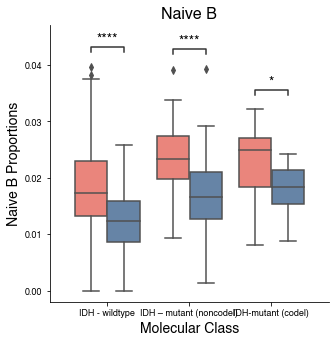

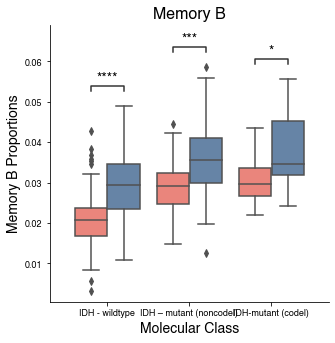

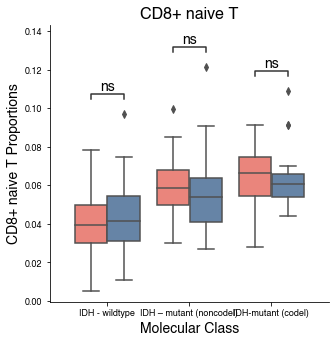

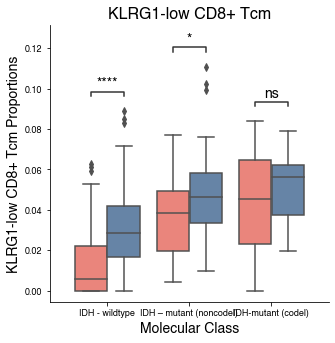

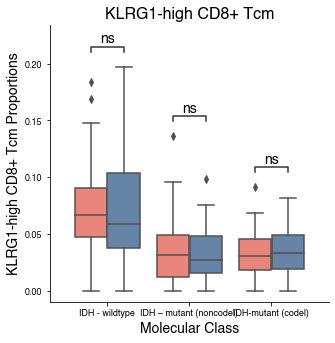

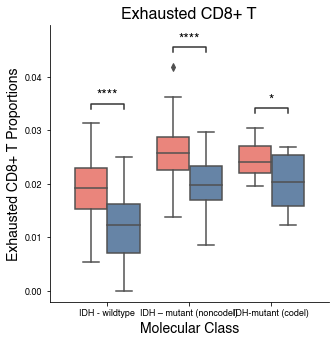

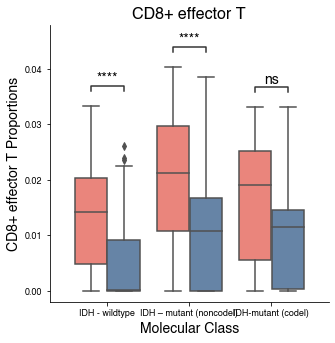

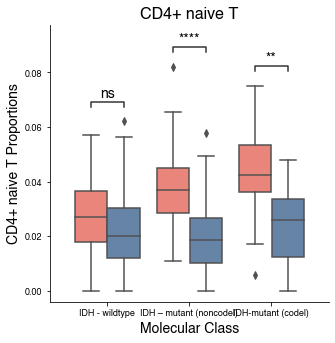

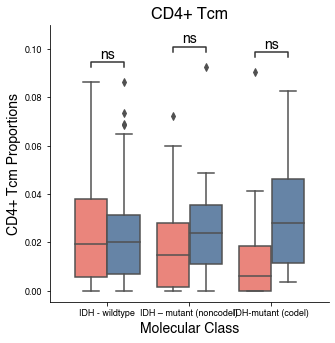

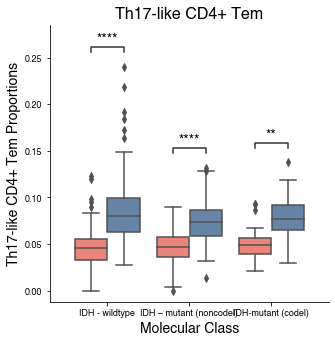

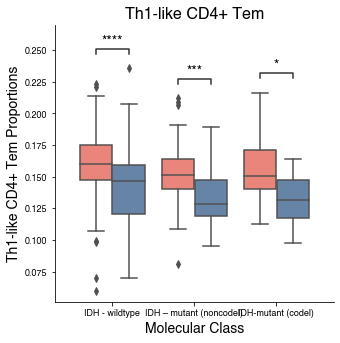

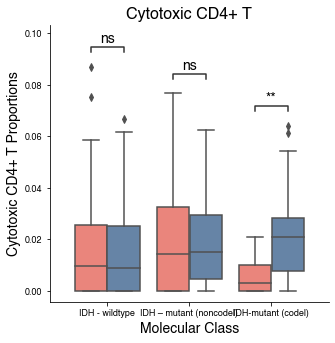

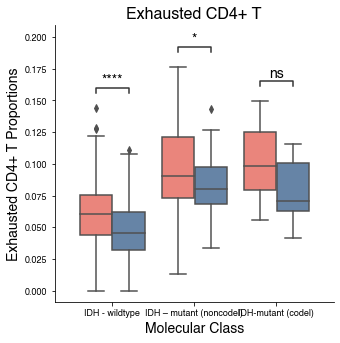

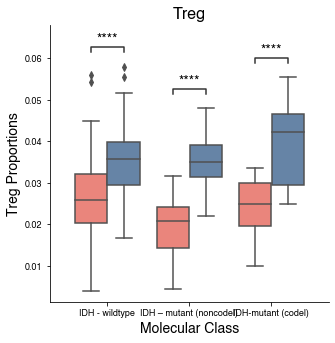

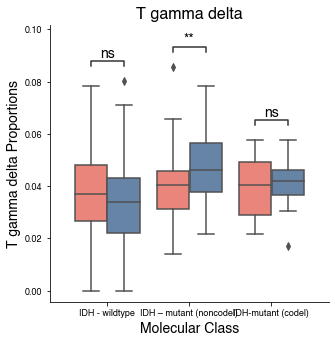

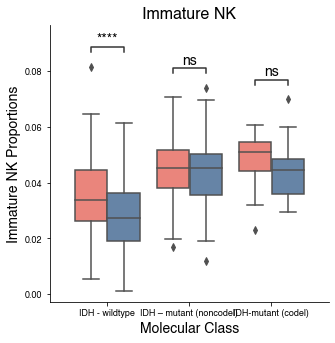

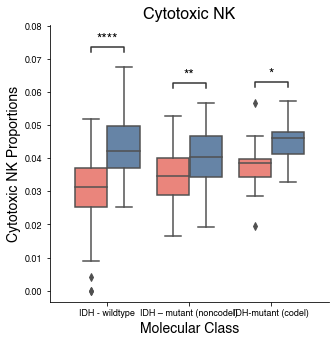

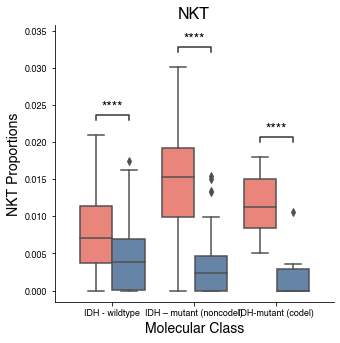

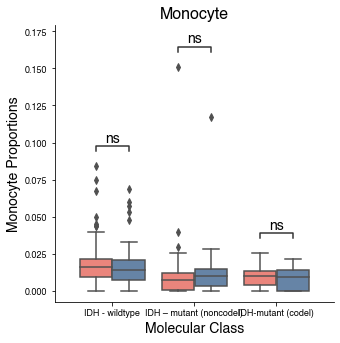

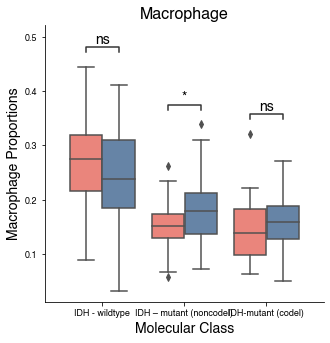

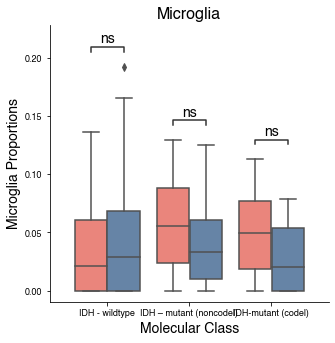

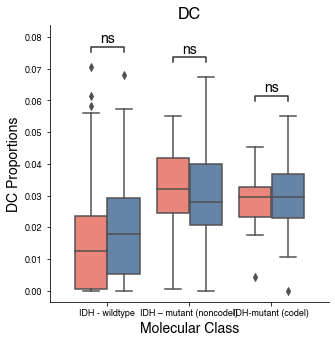

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("IDH - wildtype", "Initial"), ("IDH - wildtype", "Recurrence")),
    (("IDH – mutant (noncodel)", "Initial"), ("IDH – mutant (noncodel)", "Recurrence")),
    (("IDH-mutant (codel)", "Initial"), ("IDH-mutant (codel)", "Recurrence"))
    ]

cells = list(Initial_relative.T[0:22].index)
for c in cells:
    print(c)
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Molecular Class', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Molecular Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Molecular Class',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=7.826e-20 stat=-1.158e+01
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.966e-12 stat=-7.642e+00
IDH-mutant (codel)_Initial v.s. IDH-mutant (codel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.117e-05 stat=-5.511e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IDH – mutant (noncodel)_Initial v.s. IDH – mutant (noncodel)_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.410e-01
IDH - wildtype_Initial v.s. IDH - wildtype_Recurrence: t-test

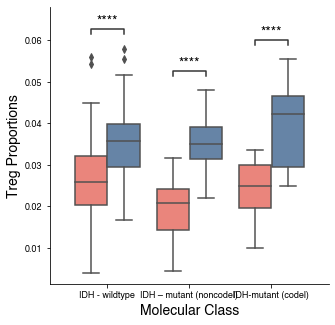

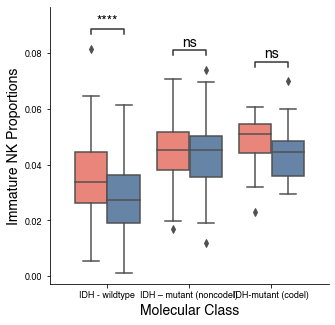

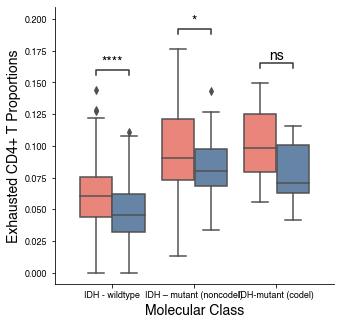

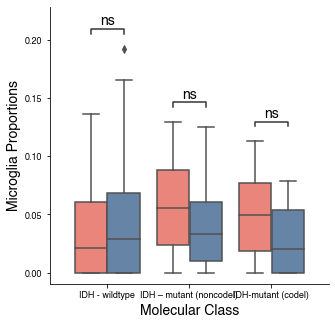

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("IDH - wildtype", "Initial"), ("IDH - wildtype", "Recurrence")),
    (("IDH – mutant (noncodel)", "Initial"), ("IDH – mutant (noncodel)", "Recurrence")),
    (("IDH-mutant (codel)", "Initial"), ("IDH-mutant (codel)", "Recurrence"))
    ]

cells = ["Treg", "Immature NK", "Exhausted CD4+ T", "Microglia"]
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    #plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Molecular Class', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Molecular Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Molecular Class',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )


In [17]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for c in cells:
    specific_cell_type = final_mdf.loc[final_mdf['variable'] == c]
    for m in m_class:
        specific_class = specific_cell_type.loc[specific_cell_type['Molecular Class'] == m]
        first = specific_class.loc[specific_class['Type'] == 'Initial']
        second = specific_class.loc[specific_class['Type'] == 'Recurrence']
        print(c,' - ', m)
        print('Between Initial and Recurrence: ')
        print(ranksums(first.iloc[:,4], second.iloc[:,4]))
        print ('--------------------------------')

Treg  -  IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-7.121165468485686, pvalue=1.0701821653027557e-12)
--------------------------------
Treg  -  IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-7.970454740747395, pvalue=1.5809155593992565e-15)
--------------------------------
Treg  -  IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.891547782585246, pvalue=9.960676730462401e-05)
--------------------------------
Immature NK  -  IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=4.0553548324567785, pvalue=5.005825379311927e-05)
--------------------------------
Immature NK  -  IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=0.7736412024053345, pvalue=0.43914299946575897)
--------------------------------
Immature NK  -  IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=1.645207192637665, pvalue=0.09992709075734191)